In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from minisom import MiniSom
from tslearn.generators import random_walks
from tslearn.utils import to_pyts_dataset

In [2]:
X = random_walks(n_ts=100, sz=100, d=5)
X = to_pyts_dataset(X)
X = X.reshape(len(X), -1)
X.shape

(100, 500)

In [3]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(X))))
som_x

4

In [4]:
som = MiniSom(som_x, som_y,len(X[0]), sigma=0.3, learning_rate = 0.1)
som.random_weights_init(X)
som.train(X, 50000)

In [5]:
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

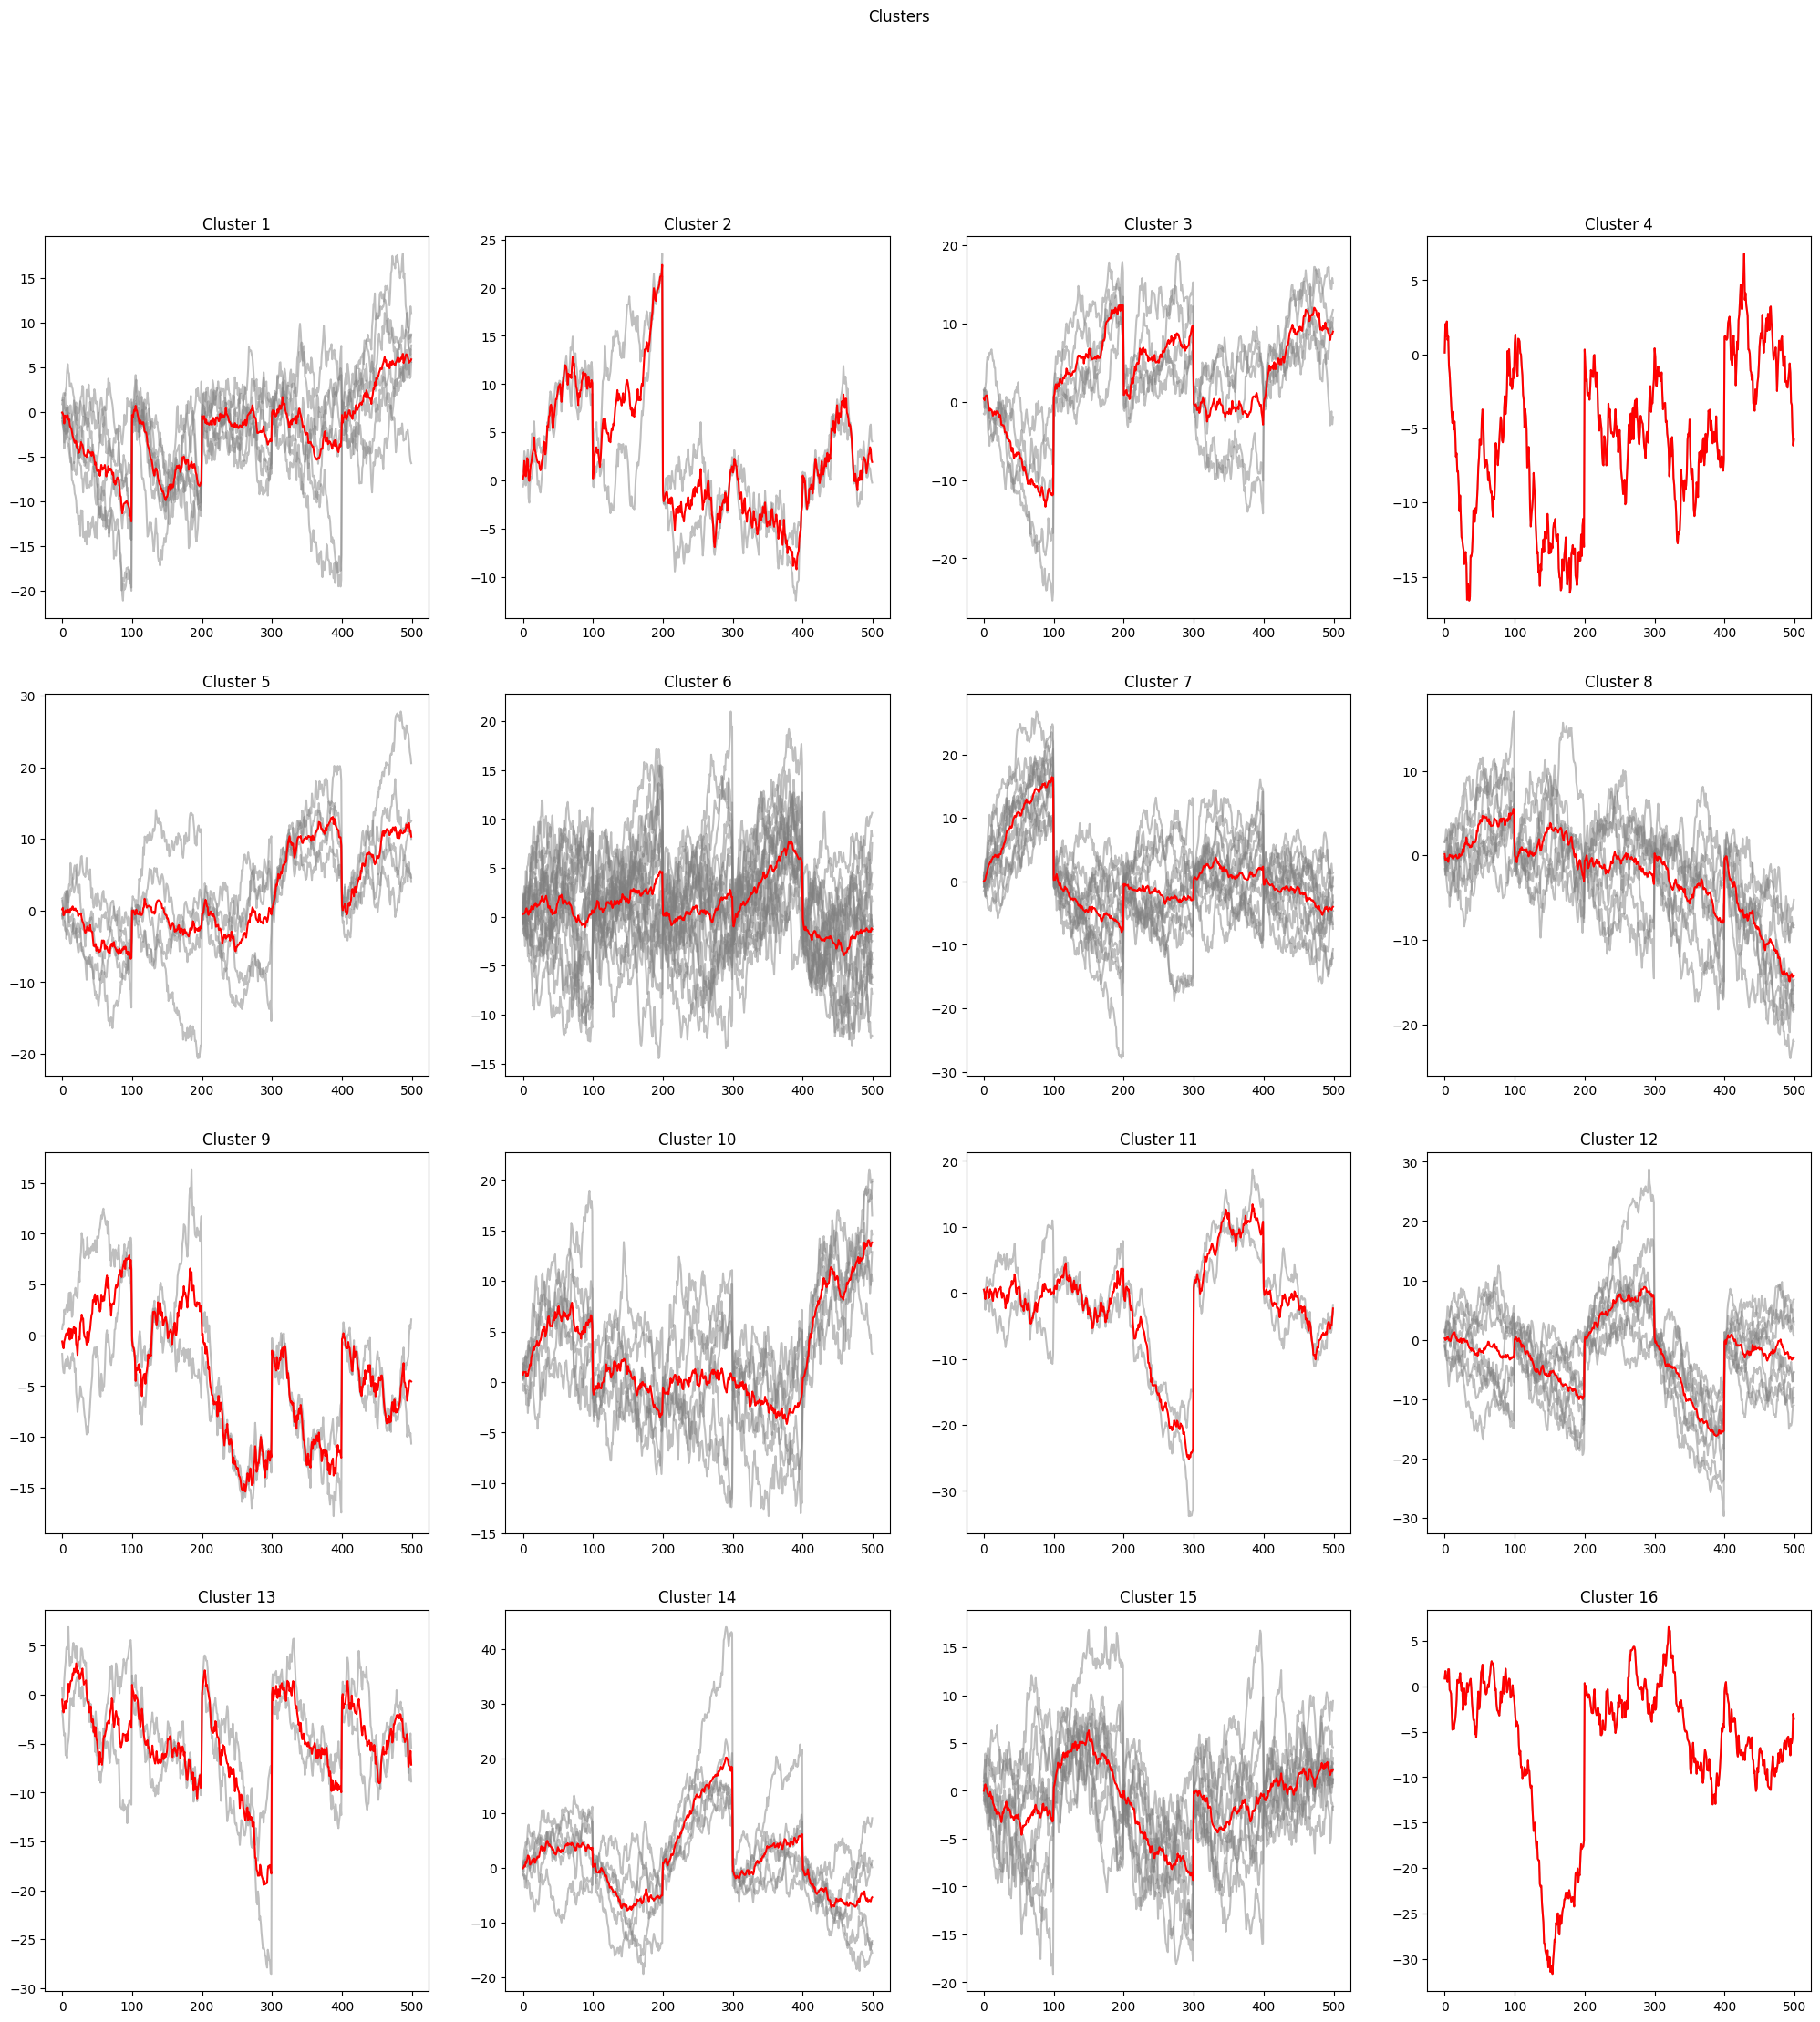

In [6]:
win_map = som.win_map(X)
# Returns the mapping of the winner nodes and inputs

plot_som_series_averaged_center(som_x, som_y, win_map)

In [7]:
cluster_map = []
for idx in range(len(X)):
    winner_node = som.winner(X[idx])
    cluster_map.append((str(idx), f"Cluster {winner_node[0]*som_y+winner_node[1]+1}"))

pd.DataFrame(cluster_map,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

,Cluster
Series,
99,Cluster 1
80,Cluster 1
78,Cluster 1
70,Cluster 1
33,Cluster 1
...,...
3,Cluster 8
71,Cluster 8
4,Cluster 8


In [13]:
np.array([som.winner(X[idx])[1] for idx in range(len(X))])

array([1, 2, 0, 3, 3, 3, 0, 2, 1, 2, 3, 1, 0, 1, 3, 1, 1, 1, 2, 2, 1, 0,
       1, 2, 1, 1, 3, 3, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 3, 1, 3, 1, 2, 2,
       1, 1, 3, 2, 2, 1, 1, 1, 3, 0, 2, 0, 1, 2, 2, 3, 1, 1, 2, 0, 1, 2,
       1, 1, 0, 1, 0, 3, 2, 1, 3, 2, 1, 3, 0, 1, 0, 1, 3, 3, 1, 0, 2, 2,
       2, 2, 3, 2, 3, 2, 3, 1, 1, 1, 0, 0], dtype=int64)